# Data Preparation

### 1) Memanggil Library pandas

Pandas kita gunakan untuk membaca dataset yang bentuknya dalam format “csv”

In [1]:
import pandas as pd

### 2) Memanggil Dataset

Data pertama adalah movies.csv yang berisi movieId, title, dan genres

In [2]:
data1 = pd.read_csv('movies.csv')
data1.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


Data Kedua adalah ratings.csv yang berisi userId, movieId, dan rating

In [3]:
data2 = pd.read_csv('ratings.csv')
data2.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### 3) Merge Dataset
Data ketiga merupakan hasil gabungan dari data movies dan rating. Menggunakan fungsi Merge

In [4]:
data3 = pd.merge(data1, data2)
data3.head(10)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0,965705637
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5,1407618878
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27,3.0,962685262
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,5.0,850466616


In [5]:
data3 = pd.merge(data1, data2)
data3.tail(10)

,movieId,title,genres,userId,rating,timestamp
100826,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554
100827,193567,anohana: The Flower We Saw That Day - The Movi...,Animation|Drama,184,3.0,1537099103
100828,193571,Silver Spoon (2014),Comedy|Drama,184,4.0,1537099392
100829,193573,Love Live! The School Idol Movie (2015),Animation,184,4.0,1537099811
100830,193579,Jon Stewart Has Left the Building (2015),Documentary,184,3.5,1537107259
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021
100835,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,331,4.0,1537157606


Pada data yang kita gunakan, umumnya ada data yang tidak ada, alias kosong, alias null, atau None, atau umum ditandai dengan NaN pada Python.
Berikut cara mengecek NaN pada data.

In [6]:
print("Jumlah NaN pada data : ", sum(data3.isnull().any()))

Jumlah NaN pada data :  0


In [7]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
movieId      100836 non-null int64
title        100836 non-null object
genres       100836 non-null object
userId       100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


## Exploratory Data Analysis

### 4)  Memanggil Library yang dibutuhkan

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data3.userId.nunique(), data3.movieId.nunique()

(610, 9724)

Dari hasil tersebut didapatkan 610 user yang unik dan 9724 items yang unik.

###  5) Keseluruhan rating yang diberikan oleh user

<function matplotlib.pyplot.show(close=None, block=None)>

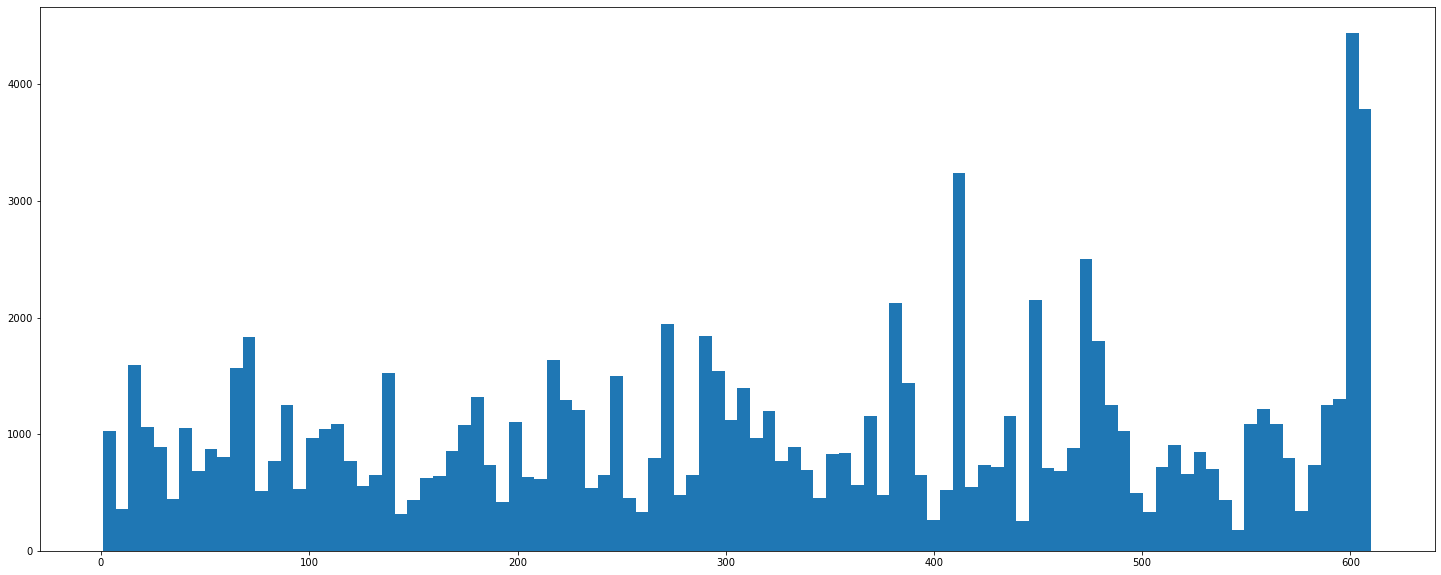

In [26]:
plt.figure(figsize=(25,10))
plt.hist(x=[data3.userId], bins=100)
plt.show

### 6) Distribusi rating user

C:\Users\Personal\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


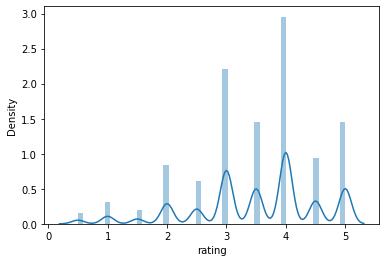

In [32]:
sns.distplot(data3["rating"]);

### 7) 10 movie yang paling banyak dirating

In [54]:
common = data3.groupby('title').size().sort_values(ascending=False)[:10]
common

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
dtype: int64

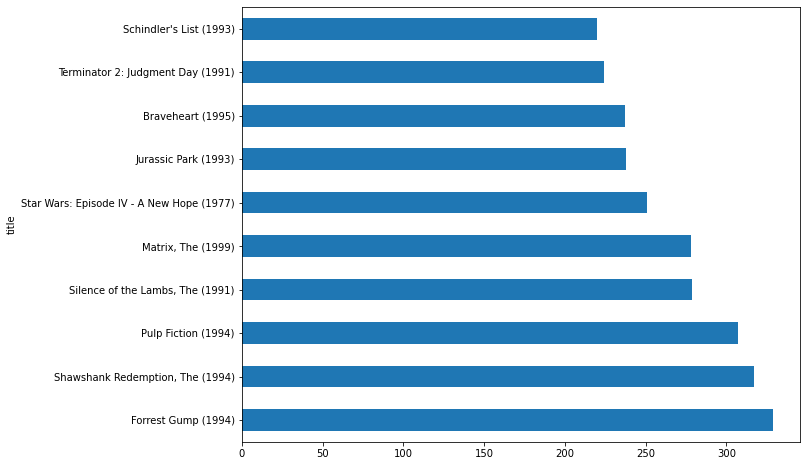

In [55]:
common = data3.groupby('title').size().sort_values(ascending=False)[:10]
common.plot(kind='barh', figsize=(10,8));

In [29]:
data3.head(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


### 8) Genre yang paling populer berdasarkan jumlah movie yang dirilis

<BarContainer object of 19 artists>

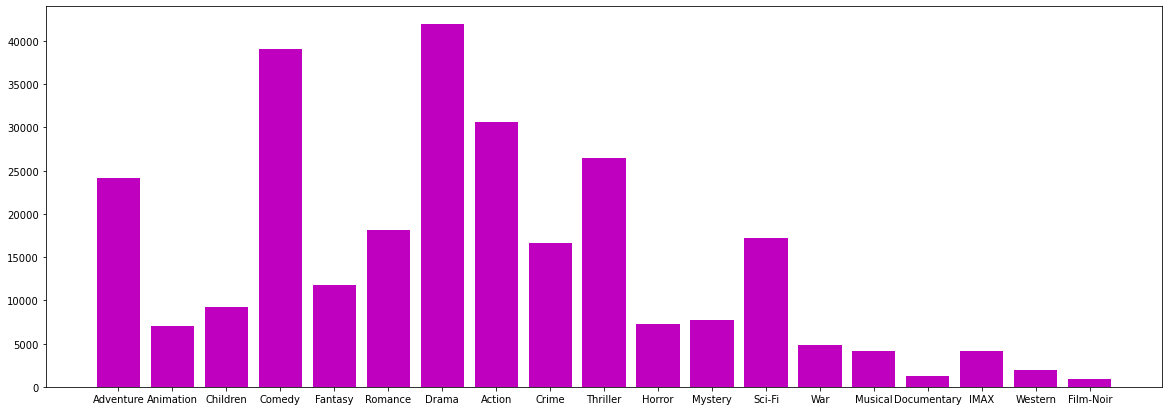

In [30]:
plt.figure(figsize=(20,7))
generlist = data3['genres'].apply(lambda generlist_movie : str(generlist_movie).split("|"))
geners_count = {}

for generlist_movie in generlist:
    for gener in generlist_movie:
        if(geners_count.get(gener,False)):
            geners_count[gener]=geners_count[gener]+1
        else:
            geners_count[gener] = 1       
geners_count.pop("(no genres listed)")
plt.bar(geners_count.keys(),geners_count.values(),color='m')

In [82]:
movieId = data3.groupby('movieId').agg([np.mean, np.sum])
print(movieId)

             userId           rating            timestamp              
               mean    sum      mean    sum          mean           sum
movieId                                                                
1        306.530233  65904  3.920930  843.0  1.129835e+09  242914455479
2        329.554545  36251  3.431818  377.5  1.135805e+09  124938583322
3        283.596154  14747  3.259615  169.5  1.005110e+09   52265734386
4        219.857143   1539  2.357143   16.5  8.985789e+08    6290052048
5        299.571429  14679  3.071429  150.5  9.926643e+08   48640552594
...             ...    ...       ...    ...           ...           ...
193581   184.000000    184  4.000000    4.0  1.537109e+09    1537109082
193583   184.000000    184  3.500000    3.5  1.537110e+09    1537109545
193585   184.000000    184  3.500000    3.5  1.537110e+09    1537109805
193587   184.000000    184  3.500000    3.5  1.537110e+09    1537110021
193609   331.000000    331  4.000000    4.0  1.537158e+09    153

In [86]:
title = data3.groupby('title').agg([np.mean, np.sum])
print(title)

                                            movieId              userId        \
                                               mean     sum        mean   sum   
title                                                                           
'71 (2014)                                 117867.0  117867  610.000000   610   
'Hellboy': The Seeds of Creation (2004)     97757.0   97757  332.000000   332   
'Round Midnight (1986)                      26564.0   53128  354.500000   709   
'Salem's Lot (2004)                         27751.0   27751  345.000000   345   
'Til There Was You (1997)                     779.0    1558  229.000000   458   
...                                             ...     ...         ...   ...   
eXistenZ (1999)                              2600.0   57200  389.954545  8579   
xXx (2002)                                   5507.0  132168  272.916667  6550   
xXx: State of the Union (2005)              33158.0  165790  386.000000  1930   
¡Three Amigos! (1986)       

### 9) Judul Film dengan Rating rata-rata terendah

In [132]:
low_rated_movies_filter = ratings_grouped_by_movies['rating']['mean']<1.5

In [134]:
low_rated_movies = ratings_grouped_by_movies[low_rated_movies_filter]

In [135]:
low_rated_movies.head(10)

,rating
,mean
movieId,
178,1.000000
312,1.444444
449,1.000000
470,1.000000
476,1.000000
698,1.000000
870,1.000000
1163,1.000000


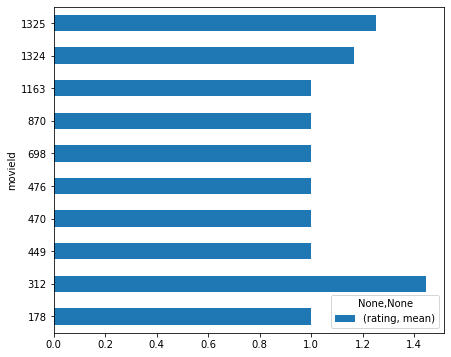

In [136]:
low_rated_movies.head(10).plot(kind='barh', figsize=(7,6));

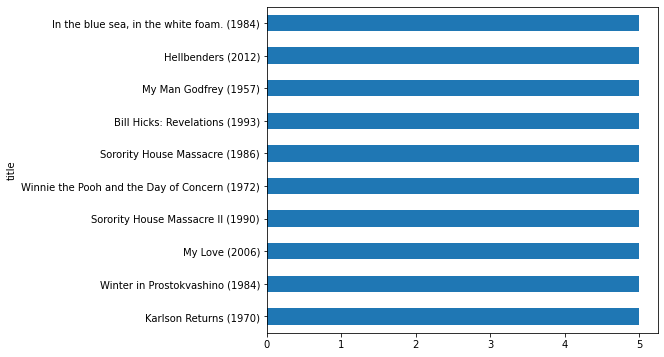

In [119]:
ratings_grouped_by_title['rating']['mean'].sort_values(ascending=False).head(10).plot(kind = 'barh', figsize=(7,6));

### 10) Judul Film dengan Rating rata-rata tertinggi

In [111]:
ratings_grouped_by_movies = data3.groupby('movieId').agg([np.mean], np.size)

In [112]:
ratings_grouped_by_movies = ratings_grouped_by_movies.drop('timestamp', axis=1)
ratings_grouped_by_movies.head(10)

,userId,rating
,mean,mean
movieId,,
1,306.530233,3.920930
2,329.554545,3.431818
3,283.596154,3.259615
4,219.857143,2.357143
5,299.571429,3.071429
6,309.647059,3.946078
7,279.000000,3.185185
8,258.250000,2.875000


In [113]:
ratings_grouped_by_movies = ratings_grouped_by_movies.drop('userId', axis=1)
ratings_grouped_by_movies.shape

(9724, 1)

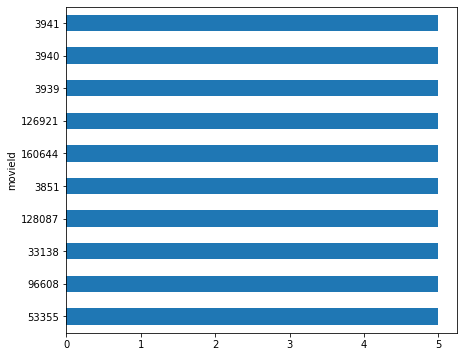

In [114]:
ratings_grouped_by_movies['rating']['mean'].sort_values(ascending=False).head(10).plot(kind = 'barh', figsize=(7,6));